In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans, KShape, silhouette_score
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import import_ipynb
import sklearn
import tslearn

/usr/lib/python3.9/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [3]:
import Prepare_time_series as pts

importing Jupyter notebook from Prepare time series.ipynb


In [4]:
szeregi=pts.przygotujSzeregiCzasowe(50,256)

# Without normalization of data

## DBA-kmeans

In [9]:
%%time
tsKmeans=TimeSeriesKMeans(6, metric="dtw",n_jobs=-1)
tsKmeans.fit(szeregi)

CPU times: user 6min 6s, sys: 12.1 s, total: 6min 18s
Wall time: 2min 48s


TimeSeriesKMeans(metric='dtw', n_clusters=6, n_jobs=-1)

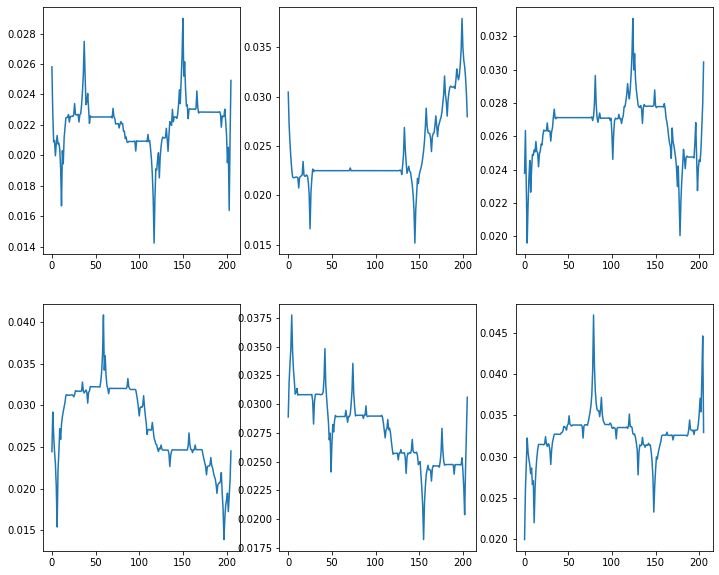

In [11]:
plt.gcf().set_size_inches((12,10))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.plot(tsKmeans.cluster_centers_[i].ravel())

In [12]:
L=tsKmeans.predict(szeregi)

/usr/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1353 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


In [16]:
silhouette_score(szeregi,L, metric="dtw", n_jobs=-1)

0.174545905309938

wynik: 0.174545905309938

## KShape

In [17]:
%%time
tsKshape=KShape(6)
tsKshape.fit(szeregi)

CPU times: user 36.2 s, sys: 10.3 ms, total: 36.3 s
Wall time: 36.3 s


KShape(n_clusters=6)

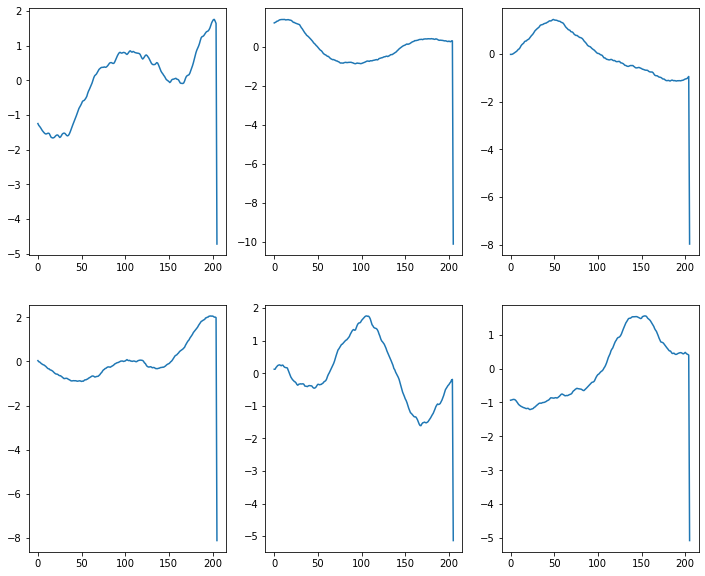

In [18]:
plt.gcf().set_size_inches((12,10))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.plot(tsKshape.cluster_centers_[i].ravel())

In [22]:
%%time
L=tsKshape.predict(szeregi)

silhouette_score(szeregi,L, metric="dtw", n_jobs=-1)

/usr/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1353 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


CPU times: user 34min 16s, sys: 1min, total: 35min 16s
Wall time: 10min 2s


-0.09424543269825263

## DBA kmeans - soft dtw

In [23]:
%%time
tsKmeansSoft=TimeSeriesKMeans(6, metric="softdtw",n_jobs=-1)
tsKmeansSoft.fit(szeregi)

CPU times: user 11min 28s, sys: 0 ns, total: 11min 28s
Wall time: 11min 29s


TimeSeriesKMeans(metric='softdtw', n_clusters=6, n_jobs=-1)

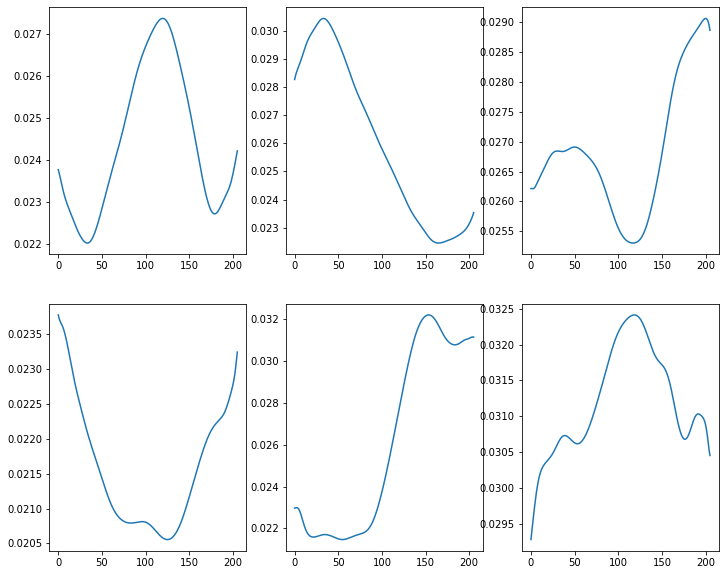

In [24]:
plt.gcf().set_size_inches((12,10))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.plot(tsKmeansSoft.cluster_centers_[i].ravel())

In [25]:
%%time
L=tsKmeansSoft.predict(szeregi)

silhouette_score(szeregi,L, metric="dtw", n_jobs=-1)

/usr/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1353 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


CPU times: user 34min 39s, sys: 1min, total: 35min 39s
Wall time: 10min 21s


0.092651217957743

In [26]:
%%time
L=tsKmeansSoft.predict(szeregi)

silhouette_score(szeregi,L, metric="softdtw", n_jobs=-1)

/usr/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1353 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


CPU times: user 47min 43s, sys: 0 ns, total: 47min 43s
Wall time: 47min 46s


0.2151445399684648

# Normalization of data

In [8]:
scaler=TimeSeriesScalerMeanVariance()
szeregi=scaler.fit_transform(szeregi)

In [10]:
%%time
tsKmeans=TimeSeriesKMeans(6, metric="dtw",n_jobs=-1)
tsKmeans.fit(szeregi)

CPU times: user 14min 40s, sys: 26.5 s, total: 15min 6s
Wall time: 11min 29s


TimeSeriesKMeans(metric='dtw', n_clusters=6, n_jobs=-1)

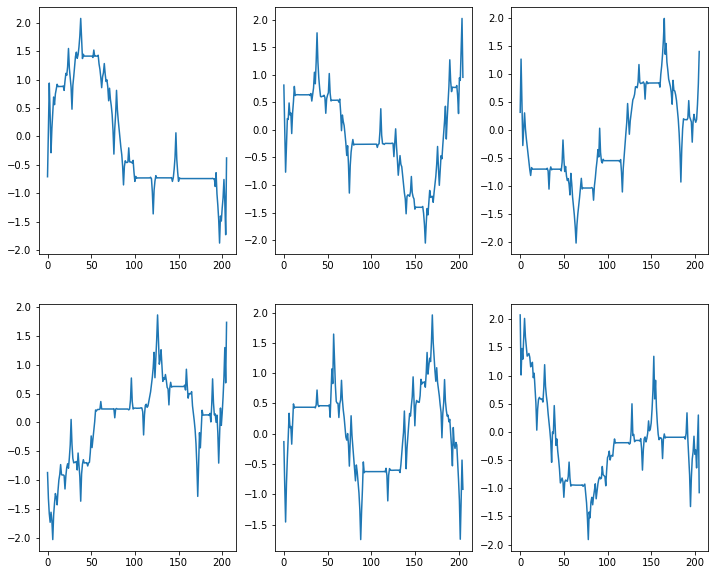

In [11]:
plt.gcf().set_size_inches((12,10))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.plot(tsKmeans.cluster_centers_[i].ravel())

In [18]:
%%time
odl=sklearn.metrics.pairwise_distances(szeregi[:,:,0], metric=tslearn.metrics.dtw,n_jobs=-1)

CPU times: user 2h 7min 19s, sys: 1min 24s, total: 2h 8min 43s
Wall time: 38min 39s


In [20]:
%%time
L=tsKmeans.predict(szeregi)

silhouette_score(odl,L, metric="precomputed", n_jobs=-1)

CPU times: user 18.7 s, sys: 522 ms, total: 19.2 s
Wall time: 5.61 s


0.12912138021671027

## DBA kmeans - soft dtw

In [21]:
%%time
tsKmeansSoft=TimeSeriesKMeans(6, metric="softdtw",n_jobs=-1)
tsKmeansSoft.fit(szeregi)

CPU times: user 42min 32s, sys: 144 ms, total: 42min 32s
Wall time: 42min 35s


TimeSeriesKMeans(metric='softdtw', n_clusters=6, n_jobs=-1)

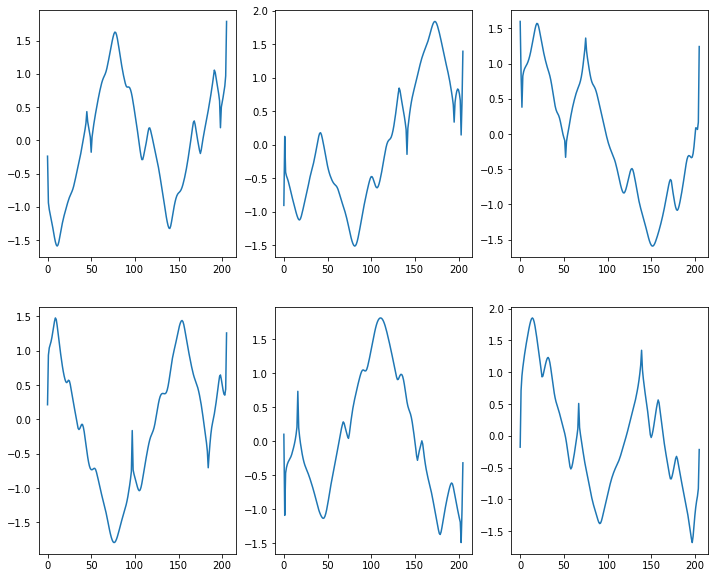

In [22]:
plt.gcf().set_size_inches((12,10))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.plot(tsKmeansSoft.cluster_centers_[i].ravel())

In [23]:
%%time
L=tsKmeansSoft.predict(szeregi)

silhouette_score(szeregi,L, metric="dtw", n_jobs=-1)

CPU times: user 34min 38s, sys: 1min 1s, total: 35min 39s
Wall time: 10min 57s


0.1138330835481501

In [24]:
%%time
L=tsKmeansSoft.predict(szeregi)

silhouette_score(szeregi,L, metric="softdtw", n_jobs=-1)

CPU times: user 49min 25s, sys: 1.23 s, total: 49min 26s
Wall time: 49min 35s


0.16817628163310824